## Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Apply on Test Images

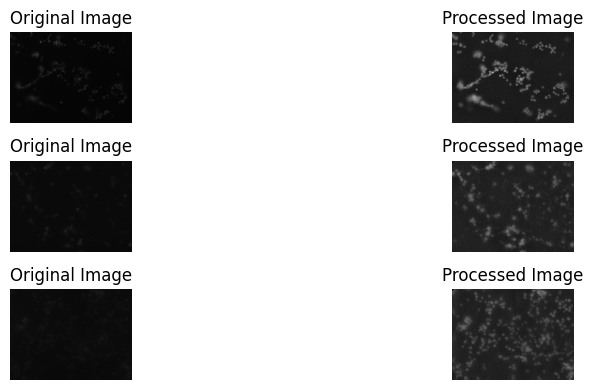

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Define input and output folders
input_folder = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/IDCIA/Test/'
output_folder = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/IDCIA/Test_clahe/'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to apply CLAHE preprocessing to an image and save it
def apply_clahe_and_save(input_image_path, output_image_path):
    # Read the original image
    original_image = cv2.imread(input_image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8, 8))

    # Apply CLAHE to the grayscale image
    adaptive_equalized_image = clahe.apply(gray_image)

    # Convert the processed image back to BGR (if needed)
    adaptive_equalized_image_bgr = cv2.cvtColor(adaptive_equalized_image, cv2.COLOR_GRAY2BGR)

    # Save the processed image
    cv2.imwrite(output_image_path, adaptive_equalized_image_bgr)

# Apply CLAHE preprocessing to all images in the input folder and save them to the output folder
for filename in os.listdir(input_folder):
    input_image_path = os.path.join(input_folder, filename)
    output_image_path = os.path.join(output_folder, filename)
    apply_clahe_and_save(input_image_path, output_image_path)

# Select 3 random images for sanity check
random_images = np.random.choice(os.listdir(input_folder), 3, replace=False)

# Plot the original and processed images side by side
plt.figure(figsize=(12, 4))
for i, image_name in enumerate(random_images, 1):
    original_image = cv2.imread(os.path.join(input_folder, image_name))
    processed_image = cv2.imread(os.path.join(output_folder, image_name))

    plt.subplot(3, 2, 2*i-1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 2, 2*i)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


Apply on Training Images

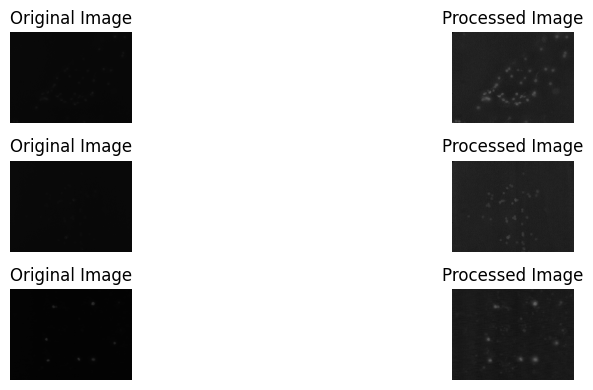

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Define input and output folders
input_folder = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/IDCIA/Train/cell_images/'
output_folder = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/IDCIA/Train_clahe/images/'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to apply CLAHE preprocessing to an image and save it
def apply_clahe_and_save(input_image_path, output_image_path):
    # Read the original image
    original_image = cv2.imread(input_image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8, 8))

    # Apply CLAHE to the grayscale image
    adaptive_equalized_image = clahe.apply(gray_image)

    # Convert the processed image back to BGR (if needed)
    adaptive_equalized_image_bgr = cv2.cvtColor(adaptive_equalized_image, cv2.COLOR_GRAY2BGR)

    # Save the processed image
    cv2.imwrite(output_image_path, adaptive_equalized_image_bgr)

# Apply CLAHE preprocessing to all images in the input folder and save them to the output folder
for filename in os.listdir(input_folder):
    input_image_path = os.path.join(input_folder, filename)
    output_image_path = os.path.join(output_folder, filename)
    apply_clahe_and_save(input_image_path, output_image_path)

# Select 3 random images for sanity check
random_images = np.random.choice(os.listdir(input_folder), 3, replace=False)

# Plot the original and processed images side by side
plt.figure(figsize=(12, 4))
for i, image_name in enumerate(random_images, 1):
    original_image = cv2.imread(os.path.join(input_folder, image_name))
    processed_image = cv2.imread(os.path.join(output_folder, image_name))

    plt.subplot(3, 2, 2*i-1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 2, 2*i)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


Convert all images from tiff to png

In [ ]:
import os
import cv2

# Path to the folder containing the TIFF images
folder_path = '/content/drive/MyDrive/Final IDCC-SAM/Dataset/Rebuttal/IDCIA/Train_clahe/images/'

# Get the list of TIFF filenames
tiff_filenames = [f for f in os.listdir(folder_path) if f.lower().endswith('.tiff') or f.lower().endswith('.tif')]

# Loop through each TIFF image
for filename in tiff_filenames:
    # Load the TIFF image
    tiff_image_path = os.path.join(folder_path, filename)
    image = cv2.imread(tiff_image_path, cv2.IMREAD_UNCHANGED)

    # Construct the PNG image path
    png_image_name = os.path.splitext(filename)[0] + '.png'
    png_image_path = os.path.join(folder_path, png_image_name)

    # Save the image as PNG
    cv2.imwrite(png_image_path, image)

    # Optionally, remove the original TIFF file
    os.remove(tiff_image_path)

    print(f"Converted {filename} to {png_image_name}")

print("Conversion complete.")


Converted 220912_GFP-AHPC_C_Map2AB_F9_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_C_Map2AB_F9_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_C_Map2AB_F10_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_C_Map2AB_F10_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_B_Map2AB_F1_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_B_Map2AB_F1_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_B_Map2AB_F2_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_B_Map2AB_F2_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_B_Map2AB_F4_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_B_Map2AB_F4_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_B_Map2AB_F6_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_B_Map2AB_F6_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_B_Map2AB_F9_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_B_Map2AB_F9_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_B_Map2AB_F10_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_B_Map2AB_F10_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_A_Map2AB_F1_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_A_Map2AB_F1_Cy3_ND2_20x.png
Converted 220912_GFP-AHPC_A_Map2AB_F2_Cy3_ND2_20x.tiff to 220912_GFP-AHPC_A_Ma